In [4]:

from math import cos, sin
import itertools as it
import math
import matplotlib.pyplot as plt


def f(t, u):
    return -sin(u)


def exact(u0, du0, t):
    # analytical solution
    return u0 * cos(t) + du0 * sin(t)


iters = []


def iterate(func, u, v, tmax, n):
    dt = tmax/(n-1)
    t = 0.0

    for i in range(n):
        u, v = func(u, v, t, dt)
        t += dt
        iters.append(u)

    return u


def euler_iter(u, v, t, dt):
    v_new = v + dt * f(t, u)
    u_new = u + dt * v
    return u_new, v_new


def rk_iter(u, v, t, dt):
    k1 = f(t, u)
    k2 = f(t+dt*0.5, u+k1*0.5*dt)
    k3 = f(t+dt*0.5, u+k2*0.5*dt)
    k4 = f(t+dt, u+k3*dt)

    v += dt * (k1+2*k2+2*k3+k4)/6

    # v doesn't explicitly depend on other variables
    k1 = k2 = k3 = k4 = v

    u += dt * (k1+2*k2+2*k3+k4)/6

    return u, v


def euler(u, v, tmax, n): return iterate(euler_iter, u, v, tmax, n)


def runge_kutta(u, v, tmax, n): return iterate(rk_iter, u, v, tmax, n)


def plot_result(u, v, tmax, n):
    dt = tmax/(n-1)
    t = 0.0
    allt = []
    error_euler = []
    error_rk = []
    r_exact = []
    r_euler = []
    r_rk = []

    u0 = u_euler = u_rk = u
    v0 = v_euler = v_rk = v

    for i in range(n):
        u = exact(u0, v0, t)
        u_euler, v_euler = euler_iter(u_euler, v_euler, t, dt)
        u_rk, v_rk = rk_iter(u_rk, v_rk, t, dt)
        allt.append(t)
        error_euler.append(abs(u_euler-u))
        error_rk.append(abs(u_rk-u))
        r_exact.append(u)
        r_euler.append(u_euler)
        r_rk.append(u_rk)
        t += dt

    _plot("error.png", "Error", "time t", "error e", allt, error_euler, error_rk)
    # _plot("result.png", "Result", "time t", "u(t)", allt, r_euler, r_rk, r_exact)


def _plot(out, title, xlabel, ylabel, allt, euler, rk, exact=None):

    plt.title(title)

    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    plt.plot(allt, euler, 'b-', label="Euler")
    plt.plot(allt, rk, 'r--', label="Runge-Kutta")

    if exact:
        plt.plot(allt, exact, 'g.', label='Exact')

    plt.legend(loc=4)
    plt.grid(True)

    plt.savefig(out, dpi=None, facecolor='w', edgecolor='w',
                orientation='portrait', papertype=None, format=None,
                transparent=False)


u0 = math.pi / 12
du0 = v0 = 0
tmax = 10.0
n = 2000

print("t=", tmax)
print("euler =", euler(u0, v0, tmax, n))
print("runge_kutta=", runge_kutta(u0, v0, tmax, n))
print("exact=", exact(u0, v0, tmax))

plot_result(u0, v0, tmax*2, n*2)


def build_initial_conditions(number):
    conditions = []
    while len(conditions) < 100:
        angle = np.random.uniform(low=-math.pi, high=math.pi)
        velocity = np.random.uniform(low=-2.1, high=2.1)

        kinetic_energy = 0.5 * velocity ** 2
        potential_energy = np.cos(angle)

        if np.abs(kinetic_energy - potential_energy) < 0.99:
            conditions.append((position, velocity))

    return conditions


def generate_gaussian(angle):
    x_cm = np.cos(angle - math.pi/2)
    y_cm = np.sin(angle - math.pi/2)

    for x, y in it.product(np.linspace(-1.5, 1.5, num=51),
                           np.linspace(-1.5, 1.5, num=51)):
        x_pos = x - x_cm
        y_pos = y - y_cm
        yield {"probability": np.exp(-20*(x_pos**2+y_pos**2)),
               "x_pos": x_pos,
               "y_pos": y_pos}

('t=', 10.0)
('euler =', -0.2308178801167429)
('runge_kutta=', -0.22626182333925934)
('exact=', -0.21966841263191145)


In [12]:
import matplotlib.pyplot as plt

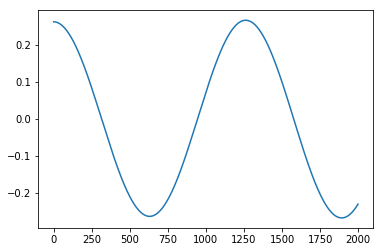

In [14]:
plt.plot(iters[:2000])
plt.show()

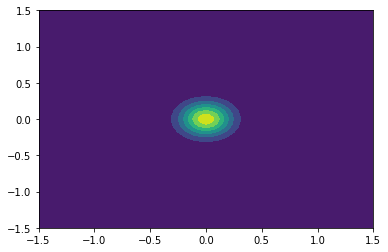

In [9]:
import numpy as np
x = np.linspace(-1.5, 1.5, 51)
y = np.linspace(-1.5, 1.5, 51)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.exp(-20*(xx**2 + yy**2))
h = plt.contourf(x, y, z)
plt.show()


In [11]:
z.shape

(51, 51)

In [15]:
a = np.zeros((500,500))

In [23]:
def calculate_gaussian_ball((x_cm, y_cm)):
    x = np.linspace(-1.5, 1.5, 51)
    y = np.linspace(-1.5, 1.5, 51)
    xx, yy = np.meshgrid(x, y, sparse=True)
    gaussian = np.exp(-20*(xx**2 + yy**2))
    
    a = np.zeros((500,500))
    a[x_cm-25:x_cm+26, y_cm-25:y_cm+26] = gaussian
    return a

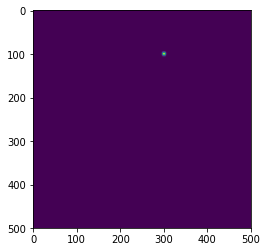

In [25]:
plt.imshow(calculate_gaussian_ball((100, 300)))

0.261799387799


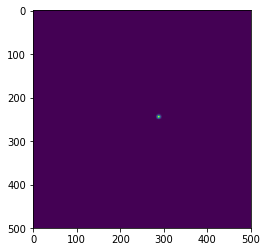

0.229726288973


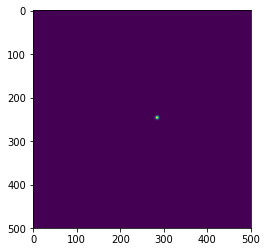

0.141688544008


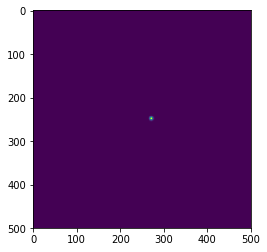

0.0188071874183


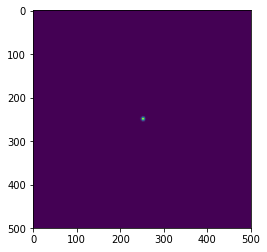

-0.108990119497


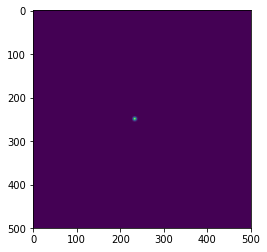

-0.210441280112


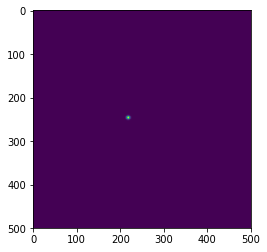

-0.260887646056


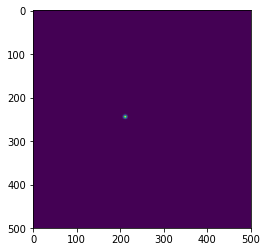

-0.248125480284


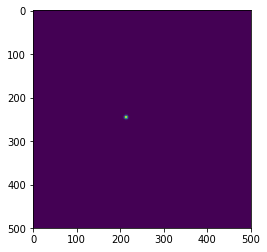

-0.175044799536


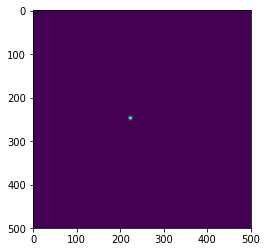

-0.0590702446027


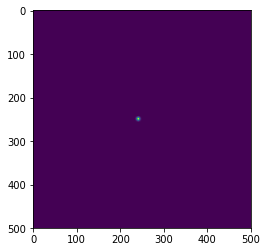

0.071662111319


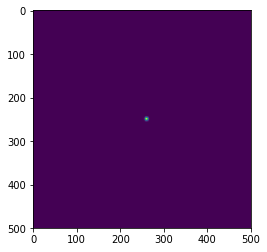

0.185172835363


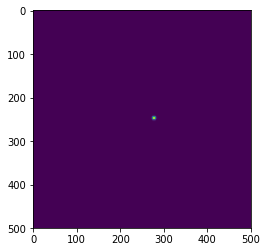

0.253802282369


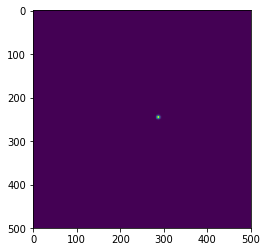

0.260957748475


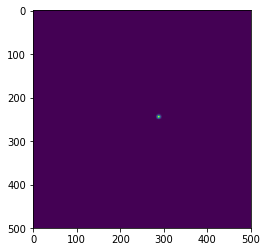

0.204784116525


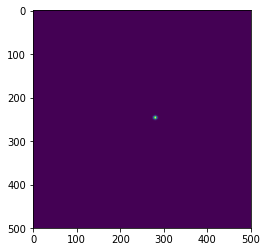

0.0985812845931


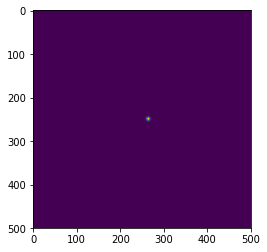

-0.0320104333979


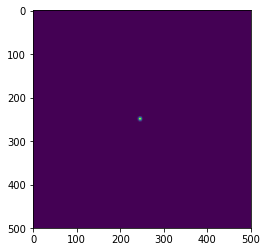

-0.155086024151


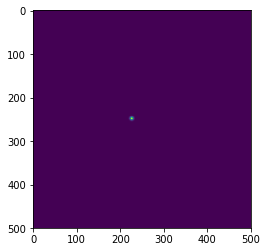

-0.240590215013


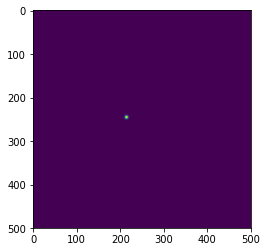

-0.267819174636


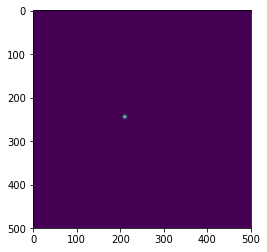

0.261792926473


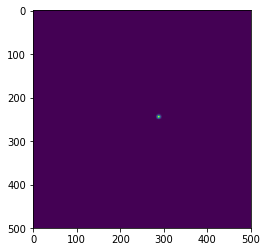

0.229201570282


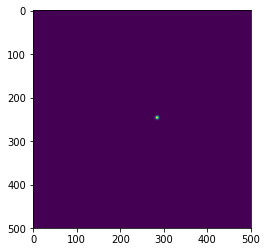

0.14104989708


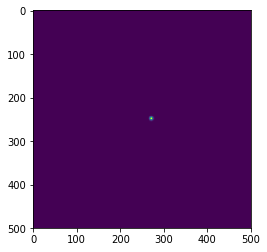

0.0185534717705


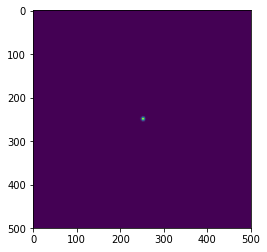

-0.108472679607


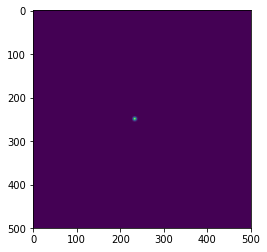

-0.209057079656


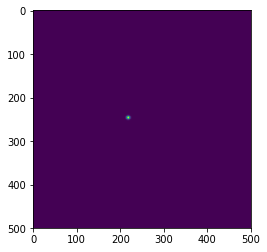

-0.258902986321


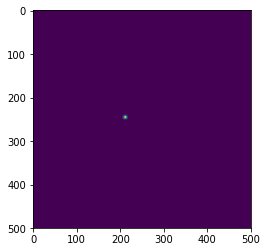

-0.246113461326


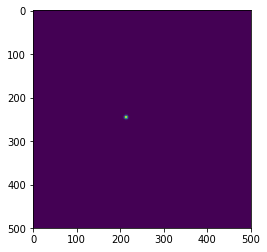

-0.173729799952


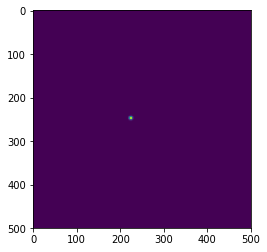

-0.0591034978696


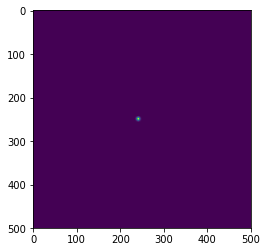

0.0699463952626


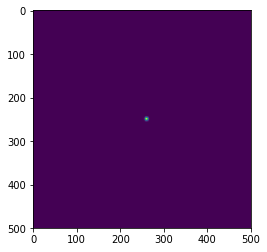

0.181929859887


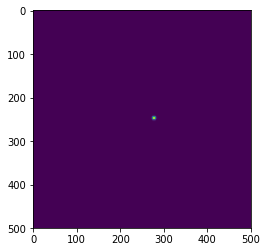

0.249694477375


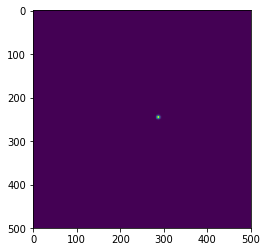

0.257012581903


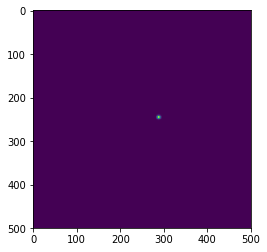

0.202144263917


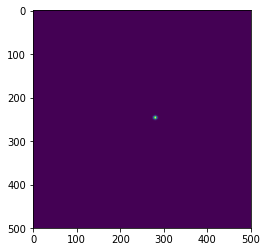

0.0981960964442


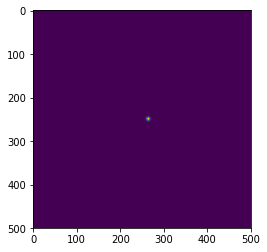

-0.0296957013845


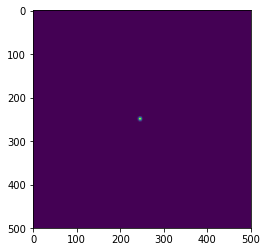

-0.150337991813


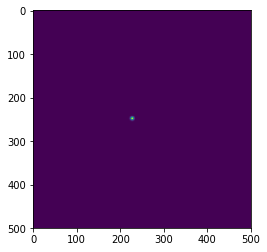

-0.234387476886


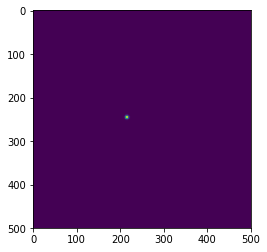

-0.261638271077


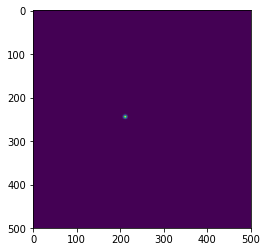

In [33]:
for theta in iters[::100]:
    print(theta)
    length = 150
    x = 250 + length * np.sin(theta)
    y = 250 - (length * (1 - np.cos(theta)))
    plt.imshow(calculate_gaussian_ball((int(y), int(x))))
    plt.show()